<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/code/handling_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**How to handle missing values?**
* Deletion of missing data :
    * Remove complete row or the part which contains missing values. Suitable for cases when small amount of data is missing.
    * Column deletion : Remove whole column in case a lot of values are missing for a particular column as they would produce incosistent results.

* Imputation or Replacement
    * Mean, Median or Mode imputation : Replacing missing values with the mean, median or mode.
    * Regression imputation : Predict the missing values uisng regresssion, this is done mostly in cases when we have data which is not comparable.
    * KNN, multiple imputation : Using knn or by generation of multiple datasets.

In [ ]:
#@title Working on Placement Data
data_url = 'https://raw.githubusercontent.com/krahul2024/machine-learning/main/data/Placement_Dataset.csv'
placement_data = pd.read_csv(data_url)

Finding count of total null values for each of the columns

In [ ]:
placement_data.isnull().sum()  # this gives total no. of missing values in each column

In this dataset about 67 of total 215 rows have missing salary values , so in this case deletion of rows is not an efficient way as it is way too much.
In this case we will use imputation.
Here we can use central tendencies for imputation.
Mean, Median, Mode

Analysis of the distribution of data , as we can't just impute missing values with mean , median or mode. First we need to analyse the data and then according to that select the method to use

In [ ]:
sns.displot(placement_data['salary'])

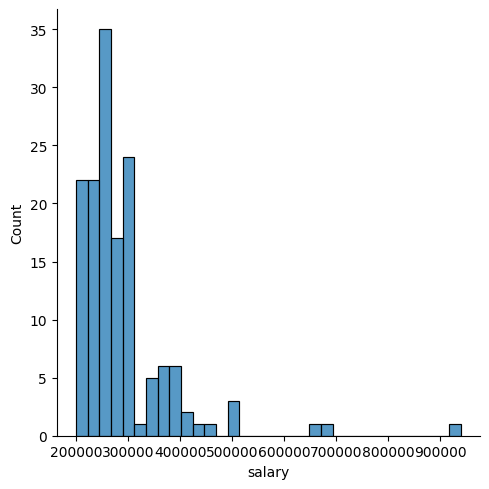


This is distribution of salary , in tihs case we can't use mean to replace missing values,  reason is most of  the data lying on the left side, so here we will be using either median or mode .

In [ ]:
# using median to replace the missing values
placement_data['salary'].fillna(placement_data['salary'].median(), inplace = True)
placement_data.isnull().sum() # now there are no missing values

Creating an instance and filling with mean values

In [14]:
# filling missing values with mean values
place_data = placement_data
place_data['salary'].fillna(place_data['salary'].median(), inplace = True)

In [15]:
#@title Data Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.datasets

Using Breast Cancer dataset

In [25]:
cancer_dataset = sklearn.datasets.load_breast_cancer()
# loading this dataset to pandas dataframe
cancer_data = pd.DataFrame(cancer_dataset.data, columns = cancer_dataset.feature_names)
# as this dataframe doesn't include target so we have to store this somewhere as this is result
X = cancer_data
Y = cancer_dataset.target